Celem tego programu jest rozpoznawanie liczb z obrazów za pomocą biblioteki PyTorch
Źródło: https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [34]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [35]:
# Używanie GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [36]:
# Definiowanie transformacji w celu normalizacji danych
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [37]:
# Pobieranie i ładowanie danych treningowych
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [38]:
# Odkrywanie Danych
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


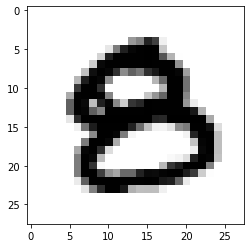

In [39]:
# Wczytywanie liczby
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

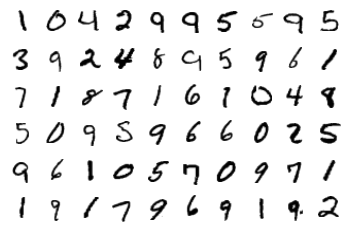

In [40]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [41]:
# Szczegóły warstwy dla sieci neuronowej
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Zbuduj sieć feed-forward
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [42]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log prawdopodobieństwa
loss = criterion(logps, labels) #Obliczanie straty NLL

In [43]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-7.3082e-04, -7.3082e-04, -7.3082e-04,  ..., -7.3082e-04,
         -7.3082e-04, -7.3082e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.5899e-05,  8.5899e-05,  8.5899e-05,  ...,  8.5899e-05,
          8.5899e-05,  8.5899e-05],
        ...,
        [-2.7028e-03, -2.7028e-03, -2.7028e-03,  ..., -2.7028e-03,
         -2.7028e-03, -2.7028e-03],
        [-7.7272e-04, -7.7272e-04, -7.7272e-04,  ..., -7.7272e-04,
         -7.7272e-04, -7.7272e-04],
        [-6.5892e-04, -6.5892e-04, -6.5892e-04,  ..., -6.5892e-04,
         -6.5892e-04, -6.5892e-04]])


In [45]:
# Optymalizatory wymagają parametrów do optymalizacji i szybkości uczenia 
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Spłaszczyć obrazy MNIST w długim wektorze 784
        images = images.view(images.shape[0], -1)
    
        # Szkolenie
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        # model uczy się poprzez propagację błędów
        loss.backward()
        
        # Optymalizuje wag
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6237438564488629
Epoch 1 - Training loss: 0.28447565231432537
Epoch 2 - Training loss: 0.21819303756845848
Epoch 3 - Training loss: 0.1766631050007557
Epoch 4 - Training loss: 0.14847652198298017
Epoch 5 - Training loss: 0.12996165786307853
Epoch 6 - Training loss: 0.11194441568301018
Epoch 7 - Training loss: 0.09970248552329188
Epoch 8 - Training loss: 0.08955658563370032
Epoch 9 - Training loss: 0.08188886902005131
Epoch 10 - Training loss: 0.07470476914590388
Epoch 11 - Training loss: 0.0670805003028363
Epoch 12 - Training loss: 0.06194961872617049
Epoch 13 - Training loss: 0.05764372979523118
Epoch 14 - Training loss: 0.05211217606689399

Training Time (in minutes) = 2.1692150036493936


In [46]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


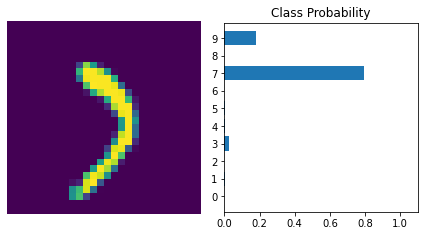

In [47]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [48]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9756


In [49]:
torch.save(model, './my_mnist_model.pt') 